In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2023-02-02 / Aki Taanila


# Aikasarjojen kuvailua ja analysointia

Seuraavassa tarvitaan **yfinance** -kirjastoa, joka ei kuulu Anacondan vakioasennukseen. Voit asentaa sen komentoriviltä (Windows: Anaconda Prompt, macOS: Terminal/Pääte) komennolla `conda install -c conda-forge yfinance`

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Tätä tarvitaan datan noutamiseen Yahoo Finance -palvelusta
import yfinance as yf

# Tyyli vaikuttaa grafiikan ulkoasuun
# Käytettävissä olevat tyylit voit listata komennolla plt.style.available
plt.style.use('seaborn-whitegrid')

## Datojen nouto

Yahoo Finance -palvelu https://finance.yahoo.com/ sisältää tietoa osakkeista, valuutoista, raaka-aineista jne. Jos esimerkiksi haen palvelun hakutoiminnolla **elisa**, niin minulle selviää, että Elisan tunnus on **ELISA.HE**. Vastaavasti Telian tunnukseksi löydän **TELIA1.HE**. Seuraavassa haen Elisan ja Telian osakkeiden historiatietoja tähän päivään saakka.

Joka kerta kun suoritan koodin, saan mukaan myös tuoreimmat tiedot.

In [4]:
elisa = yf.download('ELISA.HE', start='2018-1-1')
telia = yf.download('TELIA1.HE', start='2018-1-1')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
# Datan alku- ja loppuosa
elisa

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,32.970001,33.070000,32.689999,32.860001,27.034479,357134
2018-01-03,32.840000,33.070000,32.599998,32.689999,26.894613,348571
2018-01-04,32.770000,32.820000,32.660000,32.750000,26.943981,430650
2018-01-05,32.750000,32.970001,32.680000,32.910000,27.075613,443343
2018-01-08,32.930000,33.320000,32.930000,33.060001,27.199022,383662
...,...,...,...,...,...,...
2023-01-27,50.560001,51.759998,49.400002,51.759998,51.759998,627256
2023-01-30,51.500000,52.400002,51.060001,52.400002,52.400002,528925
2023-01-31,52.619999,52.619999,51.020000,52.380001,52.380001,647825


In [5]:
# Datan alku- ja loppuosa
telia

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,3.750,3.752,3.718,3.729,0.098224,1717521
2018-01-03,3.758,3.758,3.730,3.755,0.098909,1823437
2018-01-04,3.760,3.786,3.756,3.780,0.099568,1540541
2018-01-05,3.780,3.850,3.777,3.850,0.101412,1306020
2018-01-08,3.850,3.860,3.824,3.845,0.101280,2151101
...,...,...,...,...,...,...
2023-01-11,2.437,2.445,2.411,2.432,2.432000,1899660
2023-01-12,2.441,2.483,2.433,2.466,2.466000,1877492
2023-01-13,2.430,2.470,2.408,2.457,2.457000,1611721


## Viivakaavioita

<AxesSubplot:xlabel='Date'>

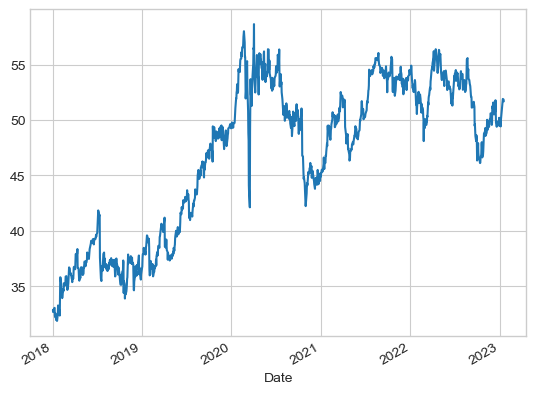

In [6]:
# Elisan päivän päätöshintojen kehitys
elisa['Close'].plot()

<AxesSubplot:xlabel='Date'>

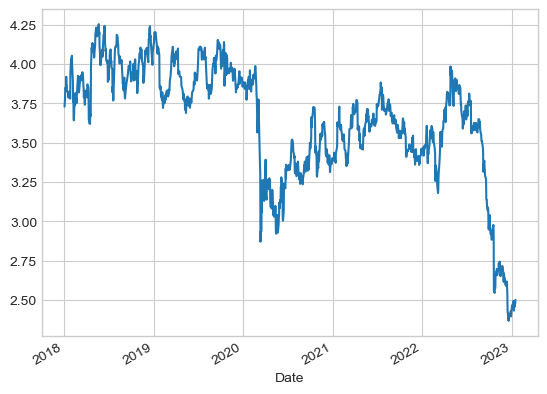

In [7]:
# Telian päivän päätöshintojen kehitys
telia['Close'].plot()

<AxesSubplot:xlabel='Date'>

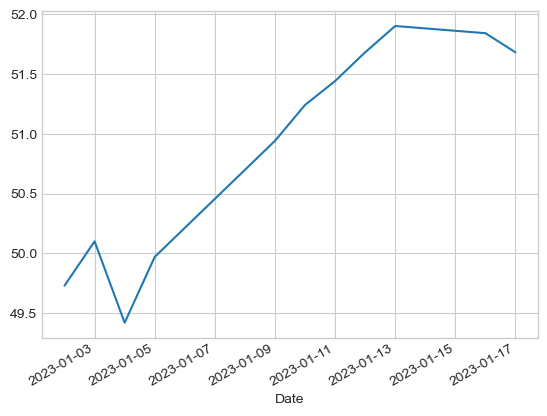

In [8]:
# Elisa vuoden 2023 alusta lähtien
elisa['Close']['2023':].plot()

<AxesSubplot:xlabel='Date'>

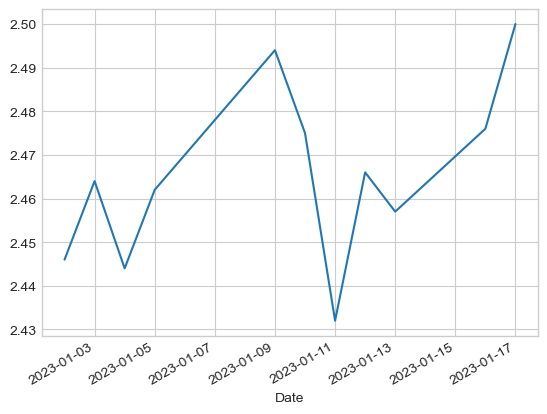

In [9]:
# Telia vuoden 2023 alusta lähtien
telia['Close']['2023':].plot()

## Aggregointi

**resample**-funktio aggregoi aikasarjan esimerkiksi päivätasolta kuukausitasolle.

resample-funktion parametrina käytettäviä arvoja:

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

<AxesSubplot:xlabel='Date'>

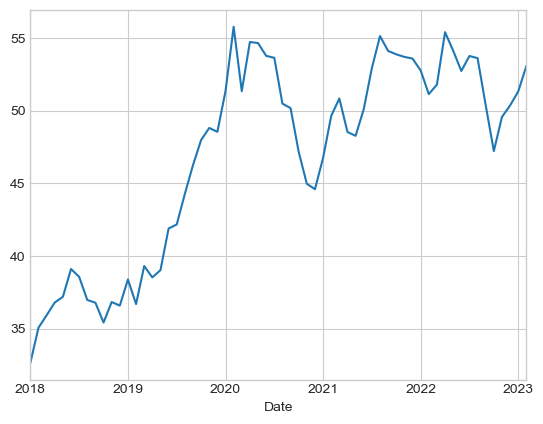

In [6]:
# Elisan päivän päätöshintojen aggregointi kuukausitasolle keskiarvoja käyttäen
elisa['Close'].resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

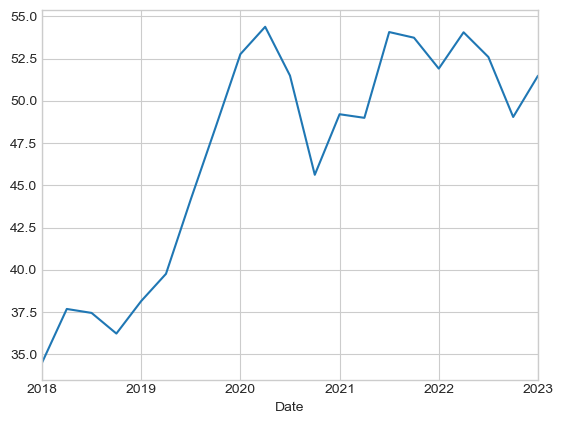

In [8]:
# Elisan päivän päätöshintojen aggregointi vuosineljännestasolle keskiarvoja käyttäen
elisa['Close'].resample('Q').mean().plot()

<AxesSubplot:xlabel='Date'>

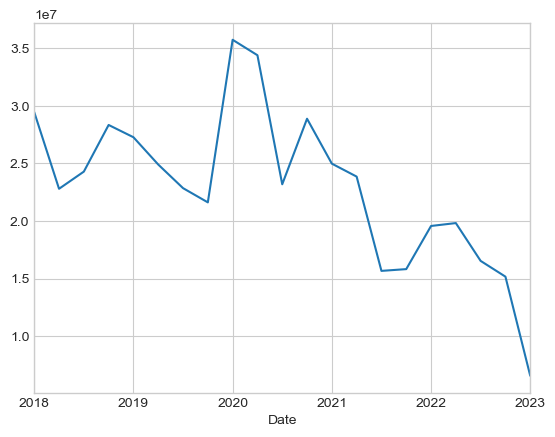

In [9]:
# Elisan osakkeen vaihdon määrä vuosineljänneksittäin (aggregointi summaa käyttäen)
# Viimeisen vuosineljänneksen kohdalla voi olla äkillinen pudotus, jos vuosineljännes on vasta aluillaan
elisa['Volume'].resample('Q').sum().plot()

## Liukuvia keskiarvoja

Liukuvilla keskiarvoilla tasoitetaan satunnaisia piikkejä. Liukuvien tunnuslukujen laskenta onnistuu **rolling**-funktiolla.

Teknisessä analyysissä aikasarjan ja liukuvien keskiarvojen leikkauskohtia käytetään osto- ja myyntisignaaleina.
Lisätietoa https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

<AxesSubplot:xlabel='Date'>

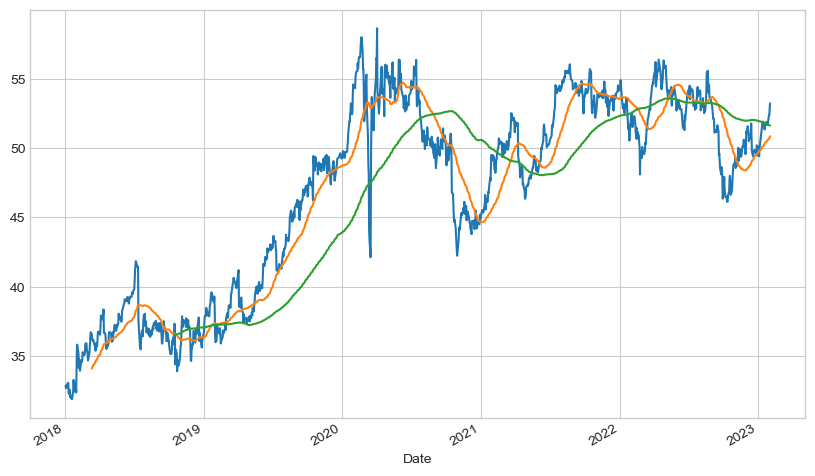

In [10]:
# Elisan päätöshinnat
elisa['Close'].plot(figsize=(10, 6))

# Elisan päätöshintojen 50 päivän liukuvat keskiarvot
elisa['Close'].rolling(50).mean().plot()

# Elisan päätöshintojen 200 päivän liukuvat keskiarvot
elisa['Close'].rolling(200).mean().plot()

## Muutosprosentit

Muutosprosentit lasketaan **pct_change**-funktiolla. Tulos on desimaalimuodossa; tarvittaessa saan prosenttiluvut kertomalla luvulla 100.

In [12]:
# Hinnan muutokset prosentteina edellisestä päivästä
elisa['Elisa%'] = elisa['Close'].pct_change()
telia['Telia%'] = telia['Close'].pct_change()

# Tarkistetaan laskennan onnistuminen
elisa

,Open,High,Low,Close,Adj Close,Volume,Elisa%
Date,,,,,,,
2018-01-02,32.970001,33.070000,32.689999,32.860001,27.034479,357134,NaN
2018-01-03,32.840000,33.070000,32.599998,32.689999,26.894613,348571,-0.005174
2018-01-04,32.770000,32.820000,32.660000,32.750000,26.943981,430650,0.001835
2018-01-05,32.750000,32.970001,32.680000,32.910000,27.075613,443343,0.004885
2018-01-08,32.930000,33.320000,32.930000,33.060001,27.199022,383662,0.004558
...,...,...,...,...,...,...,...
2023-01-27,50.560001,51.759998,49.400002,51.759998,51.759998,627256,0.001160
2023-01-30,51.500000,52.400002,51.060001,52.400002,52.400002,528925,0.012365
2023-01-31,52.619999,52.619999,51.020000,52.380001,52.380001,647825,-0.000382


In [13]:
# Muodostan Elisan ja Telian muutosprosenteista uuden datan
muutokset = pd.concat([elisa['Elisa%'], telia['Telia%']], axis=1)

# Jos päätöshinnoissa on puuttuvia arvoja (kauppaa ei ole käyty), niin muutosprosenteissakin on puuttuvia arvoja
# Ne kannattaa korvata muutosprosentilla 0 käyttäen fillna-toimintoa
muutokset = muutokset.fillna(0)

# Tarkistetaan lopputulos
muutokset

,Elisa%,Telia%
Date,,
2018-01-02,0.000000,0.000000
2018-01-03,-0.005174,0.006972
2018-01-04,0.001835,0.006658
2018-01-05,0.004885,0.018519
2018-01-08,0.004558,-0.001299
...,...,...
2023-01-27,0.001160,0.016729
2023-01-30,0.012365,-0.005759
2023-01-31,-0.000382,-0.014895


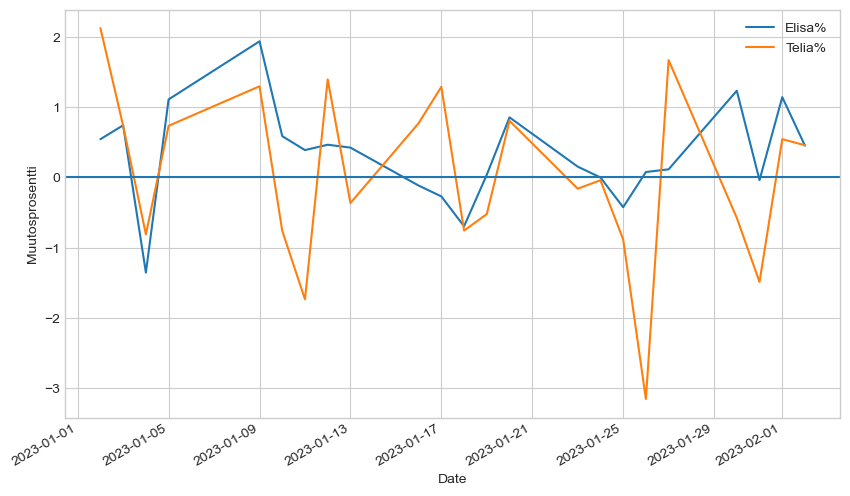

In [14]:
# Elisan ja Telian päivittäiset muutosprosentit vuoden 2023 alusta
(muutokset['2023':]*100).plot(figsize=(10, 6))

plt.ylabel('Muutosprosentti')

# Vaakaviiva nollan kohdalle; muutosprosentit vaihtelevat nollan molemmin puolin
plt.axhline()

In [15]:
# Tilastollisia tunnuslukuja muutosprosenteille
(muutokset*100).describe().round(2)

,Elisa%,Telia%
count,1280.00,1280.00
mean,0.05,-0.02
std,1.41,1.46
min,-9.22,-13.45
25%,-0.60,-0.69
50%,0.08,0.03
75%,0.75,0.73
max,16.40,11.00


In [16]:
# Päivät, jolloin muutosprosentti on jommallakummalla osakkeella ollut suurempi kuin 6 %
muutokset[(abs(muutokset['Elisa%'])>0.06) | (abs(muutokset['Telia%'])>0.06)]

,Elisa%,Telia%
Date,,
2018-04-20,-0.001125,0.083107
2018-07-13,-0.092226,-0.009455
2018-10-18,-0.074751,-0.000496
2019-04-04,-0.063350,-0.007843
2019-10-17,0.068757,-0.062849
2020-03-09,-0.040785,-0.064356
2020-03-12,-0.084077,-0.134499
2020-03-17,0.164016,0.109976
2020-03-18,0.055873,-0.061963


## Muutosprosenttien välinen korrelaatio

In [17]:
# Elisan ja Telian muutosprosentit korreloivat positiivisesti
muutokset.corr()

,Elisa%,Telia%
Elisa%,1.00000,0.46257
Telia%,0.46257,1.00000


<AxesSubplot:xlabel='Elisa%', ylabel='Telia%'>

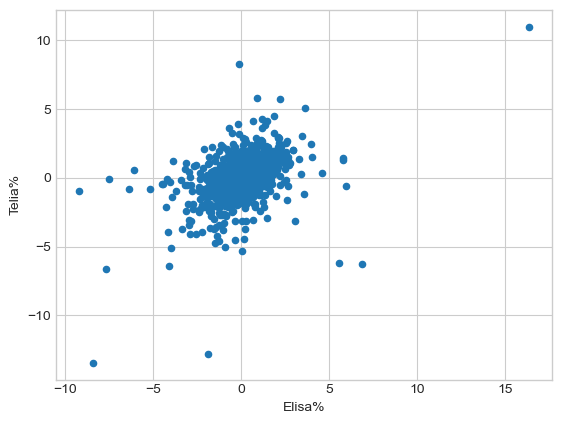

In [18]:
# Muutosprosenttien välinen positiivinen korrelaatio näkyy myös hajontakaaviossa
(muutokset*100).plot.scatter(x='Elisa%', y='Telia%')

<AxesSubplot:xlabel='Date'>

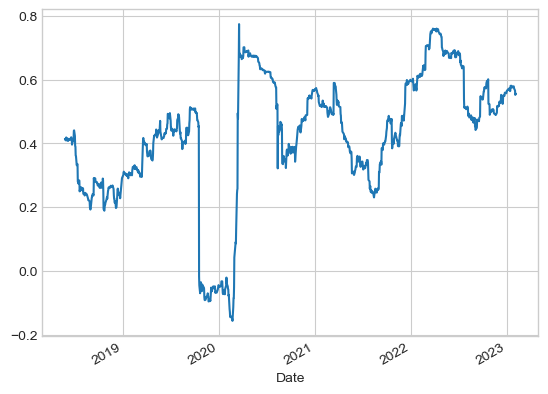

In [19]:
# Liukuva korrelaatio kertoo miten muutosprosentit korreloivat eri aikoina
muutokset['Elisa%'].rolling(100).corr(muutokset['Telia%']).plot()

## Liukuva volatiliteetti

Volatiliteetti kuvaa osakkeeseen liittyvää riskiä.

Volatiliteetti voidaan laska päivittäisten muutosprosenttien keskihajontana ( std-funktiolla ) ja se skaaltaaan vuositasolle kertomalla vuoden kaupantekopäivien lukumäärän neliöjuurella (sama kuin korotus potenssiin 0.5). Vuoteen sisältyvien kaupantekopäivien lukumäärä vaihtelee vuodesta toiseen. Tässä käytetty lukumäärää 252.

Liukuva volatiliteetti kuvaa, miten volatiliteetti (riski) on muuttunut ajan kuluessa.

<AxesSubplot:xlabel='Date'>

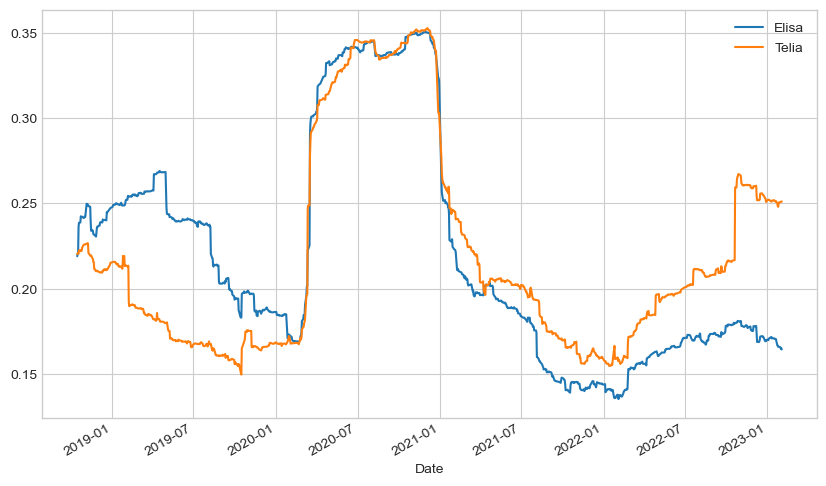

In [20]:
# 200 päivän liukuva volatiliteetti
plt.figure(figsize = (10, 6))
(muutokset['Elisa%'].rolling(200).std() * (252**0.5)).plot(label='Elisa', legend=True)
(muutokset['Telia%'].rolling(200).std() * (252**0.5)).plot(label='Telia', legend=True)

<h2>Kahden arvoakselin viivakaavio</h2>

Elisan ja Telian päätöshinnat ovat eri suuruusluokkaa. Jos haluan kuvata ne päällekkäin samaan kaavioon, niin voin käyttää kahden arvoakselin kaaviota.

Värejä https://matplotlib.org/stable/gallery/color/named_colors.html

Text(0.5, 1.0, 'Elisan ja Telian osakkeiden hinnan kehitys')

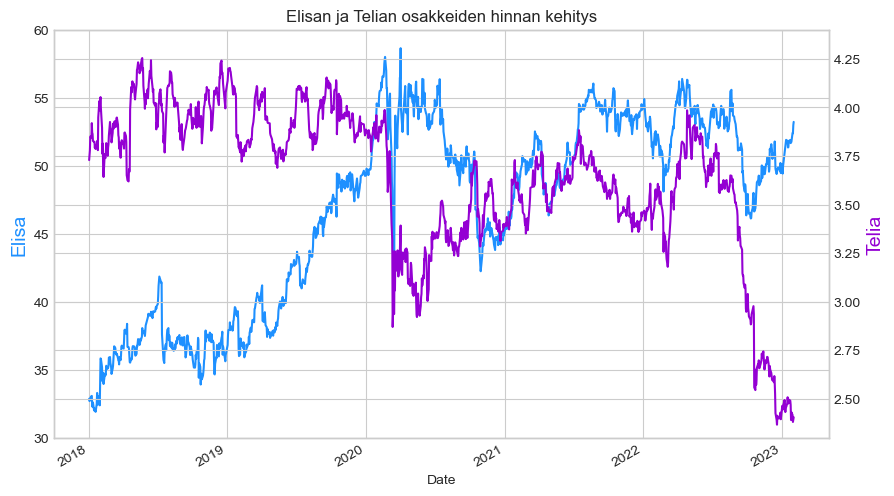

In [21]:
# Kuvion koko
plt.figure(figsize=(10, 6))

# Viivakaavio Elisan päätöshinnoista
eli = elisa['Close'].plot(color='dodgerblue')

# Elisan nimi, väri ja fonttikoko
plt.ylabel('Elisa', color='dodgerblue', fontsize=14)

# Elisan arvoakselin skaalaus (luvut valitaan läheltä pienintä ja suurinta päätöshintaa)
plt.ylim(30, 60)

# Luon Telialle kaavion (tel), jolla on yhteinen x-akseli Elisan kaavion kanssa
tel = eli.twinx()

# Viivakaavio Telian päätöshinnoista
telia['Close'].plot(ax=tel, color='darkviolet')

# Telian nimi, väri ja fonttikoko
plt.ylabel('Telia', color='darkviolet', fontsize=14)

# Telian arvoakselin skaalaus
plt.ylim(2.3, 4.4)

plt.title('Elisan ja Telian osakkeiden hinnan kehitys')

<h2>Onko viikonpäivällä yhteyttä tuottoprosenttiin?</h2>

In [22]:
viikonpaivat = ['ma', 'ti', 'ke', 'to', 'pe']

muutokset['Weekday'] = muutokset.index.weekday

df1 = (muutokset*100).groupby('Weekday')['Elisa%'].describe()
df1.index = viikonpaivat
df1

,count,mean,std,min,25%,50%,75%,max
ma,255.0,0.227965,1.182133,-4.078550,-0.456821,0.224629,0.962256,5.780507
ti,260.0,0.074687,1.569106,-3.897637,-0.605268,0.050680,0.704803,16.401613
ke,261.0,0.123110,1.233291,-3.867992,-0.517352,0.073504,0.823526,5.965581
to,256.0,-0.122248,1.521662,-8.407721,-0.744204,-0.036335,0.624531,6.875676
pe,248.0,-0.070578,1.480238,-9.222597,-0.569559,0.084000,0.721403,3.601623


In [23]:
df2 = (muutokset*100).groupby('Weekday')['Telia%'].describe()
df2.index = viikonpaivat
df2

,count,mean,std,min,25%,50%,75%,max
ma,255.0,0.087541,1.339857,-6.435643,-0.618875,0.080279,0.836899,4.142419
ti,260.0,0.137886,1.425247,-4.492134,-0.577357,0.063412,0.736724,10.997615
ke,261.0,-0.023269,1.338256,-6.196316,-0.743195,-0.092223,0.745874,5.843288
to,256.0,-0.247664,1.556669,-13.449943,-0.793155,-0.037239,0.491326,5.101370
pe,248.0,-0.075723,1.600946,-12.840602,-0.682573,0.052079,0.710855,8.310701


## Lisätietoa

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/